In [1]:
import sqlalchemy
from sqlalchemy import create_engine,Column,Integer,String,ForeignKey,Table,Text,inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker,relationship

import os
import numpy as np
import pandas as pd
import glob
from datetime import datetime

from config import *
from db_config import *

status = []
multi = []

In [ ]:
for part in session.query(Part).filter(Part.)

In [ ]:
target_build = session.query(Build).filter(Build.build_name == 'build007').one()
seq_plate = Plate([],'seq_plate','{}-seq'.format(target_build.build_name))
target_build.plates.append(seq_plate)
target_build.status = 'sequencing'
session.add(seq_plate)

# Change the status of the wells and add successful ones to seq_plate
for well in target_build.plates[0].wells:
    well.trans_outcome = 'trans_success'
    seq_plate.add_item(well.parts,address=well.address)
        
def well_addresses():
    '''Generates a list of well address A1-H12'''
    letter = ["A","B","C","D","E","F","G","H"]
    number = ["1","2","3","4","5","6","7","8","9","10","11","12"]
    target_well = []
    temp_well = 0
    for n in number:
        for l in letter:
            temp_well = l + n
            target_well.append(temp_well)
    return target_well
# Generate a dictionary to sort on well addresses A1-H1 instead of A1-A12
well_index = well_addresses()
well_index = enumerate(well_index)
well_index = [(y,x) for x,y in well_index]
well_index = dict(well_index)
        
# Iterate through the plate and add the necessary information for the map
parts = []
build_names = []
source_wells = []
target_wells = []
target_index = []
# Add all of the needed info to build a map
for well in seq_plate.wells:
    parts.append(well.parts.part_id)

    # Finds parts coming from a different build and specifies where its coming from
    build_names.append(well.plates.builds.build_name)
    source_wells.append(well.address)
    target_wells.append(well.address)
    target_index.append(well_index[well.address])

# Build the plate map and sort based on the well index
seq_plate_map = pd.DataFrame({
    'Part' : parts,
    'Build' : build_names,
    'Source Well' : source_wells,
    'Target Well' : target_wells,
    'Target Index' : target_index
})
seq_plate_map = seq_plate_map.set_index('Target Index')
seq_plate_map = seq_plate_map.sort_index()

# Generate a sequence plate map
path = '{}/builds/{}/{}_seq_plate.csv'.format(BASE_PATH,target_build.build_name,target_build.build_name)
seq_plate_map.to_csv(path,index=False)

# session.commit()

In [ ]:
for build in session.query(Build).filter(Build.build_name == 'build006'):
    for plate in build.plates:
        if plate.plate_type != 'seq_plate':
            continue
        for well in plate.wells:
            print(well.parts.part_id,well.address,well.misplaced)

In [ ]:
for build in session.query(Build).filter(Build.build_name == 'build007'):
    for plate in build.plates:
        if plate.plate_type != 'seq_plate':
            continue
        for well in plate.wells:
            print(well.parts.part_id,well.address,well.misplaced)
del_plate_wells = session.query(Well).join(Plate,Well.plates).join(Build,Plate.builds).filter(Build.build_name == 'build007').filter(Plate.plate_type == 'seq_plate')
print()
for well in del_plate_wells:
    print(well.parts.part_id,well.address,well.misplaced)

In [ ]:
other = ['build007']

# build = session.query(Build).filter(Build.build_name == 'build007').one()
# for well in build.plates[0].wells:
#     print(well.parts.part_id,well.address)

# for plate in session.query(Plate).filter(Plate.plate_type == 'assembly_plate'):
#     current_build = plate.builds.build_name
#     if current_build not in other:
#         continue
#     print(current_build)
#     if current_build in other:
#         build_file = glob.glob('../builds/{}/build*trans*.csv'.format(current_build))[0]
#         part = 'Gene'
#         well_name = 'Destination'
#     else:
#         continue
# current_build = 'build007'
# build_file = glob.glob('../builds/{}/build*20*.csv'.format(current_build))[0]
# part = 'Gene'
# well_name = 'Destination'
# new_build = Build([],current_build)
# new_build.plates.append(Plate([],'assembly_plate','Assembly_0'))
# build = pd.read_csv(build_file)
# #     build_tup = []
# for i,row in build.iterrows():
#     if 'Unk' in row['Gene']:
#         continue
#     part = session.query(Part).filter(Part.part_id == row['Gene']).one()
#     new_build.add_item(part,row['Destination'])
#         build_tup.append([row[part],row[well_name]])
#         print(current_build,build_tup[-1])
    
#     plate_tup = []
#     for well in plate.wells:
#         print("seq_plate",current_build,well.parts.part_id,well.address)
#         cur_tup = [well.parts.part_id,well.address]
#         plate_tup.append(cur_tup)
# #         if cur_tup not in build_tup:
# #             well.misplaced = 'True'
# #         print(well.misplaced)
# #         seq_tup.append([well.parts.part_id,well.address])
#     diffs = [tup for tup in plate_tup if tup not in build_tup]
#     print(diffs)
#     input()
# session.commit()

for build in session.query(Build).filter(Build.build_name == 'build007'):
    print(build.id,build.build_name,build.status)
#     build.status = 'building'
#     print(build.status)
#     for well in build.plates[0].wells:
#         print(well.parts.part_id,well.address)
# session.commit()

In [ ]:
confirmed = [part.part_id for part in session.query(Part).filter(Part.status == 'sequence_confirmed').order_by(Part.id)]
# print(confirmed)
author_info = []
ignore = ['Stanford BIOE80 class 2017','Stanley Qi','Keoni Gandall','Scott Pownall','Connor Tansley']
for part in confirmed:
    for file in glob.glob('../data/{}/{}.json'.format(part,part)):
#         print(file)
        with open(file,"r") as json_file:
            data = json.load(json_file)
        if data['author']['name'] in ignore:
            continue
        if data['version'] == '2.0.0':
            author_info.append([data['author']['name'],data['author']['email'],data['author']['affiliation'],data['gene_id'],data['info']['documentation']['gene_name'],data['info']['documentation']['what']])
        elif data['version'] == '3.0.0':
            author_info.append([data['author']['name'],data['author']['email'],data['author']['affiliation'],data['gene_id'],data['info']['documentation']['gene_name'],data['info']['documentation']['description']])

author_info = np.array(author_info)
authors = pd.DataFrame({
    'Name' : author_info[:,0],
    'Email' : author_info[:,1],
    'Affiliation' : author_info[:,2],
    'Gene ID' : author_info[:,3],
    'Gene Name' : author_info[:,4],
    'Description' : author_info[:,5]
})

authors = authors[['Name','Email','Affiliation','Gene ID','Gene Name','Description']]
authors.to_csv('./author_info.csv')
# unique = authors.drop_duplicates()
# unique = unique[['Name','Email']]
# unique
name_email = authors[['Name','Email']].drop_duplicates()
names = pd.Series(authors['Name'])
unique_names = names.unique()
print(names.value_counts())
current = str(datetime.now()).split(" ")[0]
print(current)
name_email

In [ ]:
genes = []
for file in sorted(glob.glob('../data/*/*.json')):
    with open(file,"r") as json_file:
        data = json.load(json_file)
    if data['author']['name'] not in unique_names:
        continue
    genes.append([data['author']['name'],data['gene_id']])

genes = np.array(genes)
df_genes = pd.DataFrame({
    'Author' : genes[:,0],
    'Gene ID' : genes[:,1]
})

for name in unique_names:
    temp = df_genes[df_genes['Author'] == name]
    print(temp)
    new_rows = []
    for i,row in temp.iterrows():
        gene = row['Gene ID']
        print("Gene",gene)
        part = session.query(Part).filter(Part.part_id == gene).one()
        attempts = [well.seq_outcome for well in part.wells if well.plates.plate_type == 'seq_plate']
        if len(attempts) == 0:
            attempts += ['N/A','N/A']
        elif len(attempts) == 1:
            attempts += ['N/A']
        print(part.part_name,part.part_id,part.status,attempts[0],attempts[1])
        new_rows.append([part.part_name,part.part_id,part.status,attempts[0],attempts[1]])
    new_rows = np.array(new_rows)
    new_df = pd.DataFrame({
        "Gene Name" : new_rows[:,0],
        "Gene ID" : new_rows[:,1],
        "Current Status" : new_rows[:,2],
        "Attempt 1" : new_rows[:,3],
        "Attempt 2" : new_rows[:,4],
    })
    new_df = new_df[['Gene Name','Gene ID','Current Status','Attempt 1','Attempt 2']]
    file_name = "{}_status_{}.csv".format(name,current)
    path = '{}/authors/{}'.format(BASE_PATH,name)
    if os.path.exists(path):
        print("Directory for {} already exists".format(name))
    else:
        # Generates a new directory with the ID# as its name
        os.makedirs(path)
        print("Making directory for {}".format(name))
    file_path = path + "/" + file_name
    new_df.to_csv(file_path,index=False)
    input("check map")
        
    


In [ ]:
for part in session.query(Part).order_by(Part.id):
    print(part.part_id,part.status)
    status.append(part.status)
#     tries = [(well.plates.builds.build_name,well.seq_outcome) for well in part.wells if well.plates.plate_type == 'seq_plate']
    
status = pd.Series(status)
print(status.value_counts())
    

In [ ]:
print(status.value_counts())

In [ ]:
# counts = status.value_counts()
counts = pd.DataFrame(status.value_counts().reset_index())
counts = counts.set_index(['index'])

ordered_states = ['sequence_confirmed','cloning_mutation','cloning_failure','sequence_failure','cloning_error','received','ordered']
ordered = sum([int(counts.loc[state]) for state in ordered_states])

received_states = ['sequence_confirmed','cloning_mutation','cloning_failure','sequence_failure','cloning_error','received']
received = sum([int(counts.loc[state]) for state in received_states])

attempted_states = ['sequence_confirmed','cloning_mutation','cloning_failure','sequence_failure','cloning_error']
attempted = sum([int(counts.loc[state]) for state in received_states])

verified_success = int(counts.loc['sequence_confirmed'])
mutations = int(counts.loc['cloning_mutation'])

failed_states = ['cloning_failure','sequence_failure','cloning_error']
failed = sum([int(counts.loc[state]) for state in failed_states])

not_attempted = int(counts.loc['received'])

abandoned = int(counts.loc['ordered'])

In [ ]:
# counts = status.value_counts()
counts = pd.DataFrame(status.value_counts().reset_index())
counts = counts.set_index(['index'])

ordered_states = ['sequence_confirmed','cloning_mutation','cloning_failure','sequence_failure','cloning_error','received','ordered']
ordered = sum([int(counts.loc[state]) for state in ordered_states])

received_states = ['sequence_confirmed','cloning_mutation','cloning_failure','sequence_failure','cloning_error','received']
received = sum([int(counts.loc[state]) for state in received_states])

attempted_states = ['sequence_confirmed','cloning_mutation','cloning_failure','sequence_failure','cloning_error']
attempted = sum([int(counts.loc[state]) for state in received_states])

verified_success = int(counts.loc['sequence_confirmed'])
mutations = int(counts.loc['cloning_mutation'])

failed_states = ['cloning_failure','sequence_failure','cloning_error']
failed = sum([int(counts.loc[state]) for state in failed_states])

not_attempted = int(counts.loc['received'])

abandoned = int(counts.loc['ordered'])
print(not_attempted)
print(failed)
print(received)
print(ordered)
print(verified_success)
print(attempted)
print(mutations)

    

In [ ]:
import json

sankey = {}

sankey['nodes'] = [
    {'id':'Ordered: {}'.format(ordered)},
    {'id':'Abandoned: {}'.format(ordered)},
    {'id':'Received: {}'.format(ordered)},
    {'id':'Build Attempted: {}'.format(ordered)},
    {'id':'Verified Success: {}'.format(verified_success)},
    {'id':'Mutation: {}'.format(mutations)},
    {'id':'Failure: {}'.format(failed)},
    {'id':'Not Yet Attempted: {}'.format(not_attempted)},
]
sankey['links'] = [
    {"source":'Ordered',"target":'Abandoned',"value":abandoned},
    {"source":'Ordered',"target":'Received',"value":received},
    {"source":'Received',"target":'Build Attempted',"value":attempted},
    {"source":'Build Attempted',"target":'Verified Success',"value":verified_success},
    {"source":'Build Attempted',"target":'Mutation',"value":mutations},
    {"source":'Build Attempted',"target":'Failure',"value":failed},
    {"source":'Build Attempted',"target":'Not Yet Attempted',"value":not_attempted}
]

with open("../docs/sankey/sankey.json","w+") as json_file:
    json.dump(sankey,json_file,indent=2)

#   "nodes":[
#     {"name":"Order 1"},
#     {"name":"Order 2"},
#     {"name":"Order 3"},
#     {"name":"Order 4"},
#     {"name":"Order 5"},
#     {"name":"Order 6"},
#     {"name":"Abandoned"},
#     {"name":"In Production"},
#     {"name":"Total Ordered"},
#     {"name":"Received"},
#     {"name":"Build Attempted"},
#     {"name":"Verified Success"},
#     {"name":"In Process"},
#     {"name":"Mutation"},
#     {"name":"Failures"},
#     {"name":"Not Yet Attempted"}
#   ],
#   "links":[
#     {"source":0,"target":8,"value":438},
#     {"source":1,"target":8,"value":27},
#     {"source":2,"target":8,"value":68},
#     {"source":3,"target":8,"value":101},
#     {"source":4,"target":8,"value":11},
#     {"source":5,"target":8,"value":25},
#     {"source":8,"target":6,"value":35},
#     {"source":8,"target":7,"value":41},
#     {"source":8,"target":9,"value":594},
#     {"source":9,"target":10,"value":578},
#     {"source":10,"target":11,"value":395},
#     {"source":10,"target":12,"value":41},
#     {"source":10,"target":13,"value":52},
#     {"source":10,"target":14,"value":90},
#     {"source":9,"target":15,"value":16}
#   ]


print(sankey)


In [2]:
good92 = np.array([[3, 253.0, 59.942962765693665, 0.8848180544068082, 14, 0.9302325795381248], [3, 114.0, 42.5974303483963, 0.7894923250383039, 18, 0.9230769230769231], [1, 32.5, 24.727921843528748, 0.66791006212238, 14, 0.823529492931798], [2, 49.0, 27.919259428977966, 0.7899473664363551, 13, 1.0689654804438824], [3, 68.5, 38.16190016269684, 0.5910720909672126, 16, 1.5000001123916011], [4, 65.0, 31.090832471847534, 0.8450035225411454, 12, 1.0], [8, 64.5, 37.97308707237244, 0.5621054141739343, 18, 1.109090923797233], [3, 64.0, 31.313708305358887, 0.8202020201250876, 15, 1.0], [2, 95.5, 39.33347296714783, 0.7756908113715495, 18, 1.2619047619047619], [7, 100.0, 38.74768650531769, 0.8369862227528013, 16, 0.9166666666666666], [8, 88.0, 39.35323786735535, 0.7140548855346719, 20, 1.121212290140307], [10, 75.0, 34.718626618385315, 0.7818907096615795, 12, 1.2222222222222223], [11, 52.0, 29.919259548187256, 0.7299809474182531, 13, 0.6486487353024105], [5, 155.0, 47.98745393753052, 0.8458359615998438, 13, 0.6399999352624407], [8, 135.0, 44.957417249679565, 0.8393458072718645, 14, 0.8571428571428571], [9, 152.5, 51.80399692058563, 0.7140903594353478, 14, 0.6666666666666666], [10, 95.0, 40.49575078487396, 0.727971805049974, 20, 1.615384695189304], [2, 73.0, 32.14213514328003, 0.8879393008207658, 11, 1.1111111111111112], [5, 59.5, 31.55634891986847, 0.7508502520643026, 20, 1.1111110738792147], [3, 96.5, 40.9612672328949, 0.7227538423576334, 19, 0.9166666666666666], [1, 18.0, 17.656854152679443, 0.7255305594341376, 9, 0.6666666666666666], [4, 112.0, 42.524810791015625, 0.7782929684452281, 14, 1.0833333333333333], [1, 54.0, 31.890199542045593, 0.6672508726502732, 16, 1.1136364415015145], [1, 105.0, 41.6963837146759, 0.75893115542108, 17, 0.7142857142857143], [19, 115.5, 42.48645544052124, 0.8040644250880844, 20, 0.7662337099308368], [20, 94.5, 38.38477599620819, 0.8059788611879676, 23, 1.0571428866852226], [24, 130.0, 43.10130214691162, 0.8793715975121748, 14, 1.0833333333333333], [25, 101.5, 40.3847758769989, 0.7820608618696597, 22, 1.3018868045708887], [3, 173.5, 48.487475633621216, 0.9273639182640814, 13, 0.9333333333333333], [4, 71.0, 31.919259548187256, 0.8757146121075573, 14, 0.9], [5, 102.0, 38.49575078487396, 0.864936944098309, 17, 0.9166666666666666], [12, 53.0, 28.524810791015625, 0.8185405310171096, 13, 1.1818182598421016], [14, 61.0, 28.867956519126892, 0.9198300935830094, 8, 0.8888888888888888], [15, 66.5, 31.676618933677673, 0.8328252217031836, 14, 1.0], [23, 184.0, 53.054479002952576, 0.8214546243972697, 15, 0.9130433864779426], [25, 207.0, 53.53514528274536, 0.9076161985519734, 16, 0.941860486155993], [26, 79.0, 34.14213526248932, 0.8516391114567559, 15, 1.0], [4, 78.0, 34.4666907787323, 0.8250975375472048, 15, 0.9333332614027119], [5, 101.0, 39.57611346244812, 0.8103356633694039, 16, 1.0491804106803564], [9, 208.0, 56.705150723457336, 0.8128832611935684, 20, 1.0625], [4, 142.5, 43.921454071998596, 0.9282635754998565, 14, 0.9285714285714286], [6, 121.0, 42.17008721828461, 0.8550396135721993, 15, 1.0833333333333333], [8, 80.0, 34.14213526248932, 0.8624193533739299, 14, 1.0], [11, 101.0, 48.997597217559814, 0.5286663538029128, 19, 0.6521739742321034], [12, 101.0, 42.524810671806335, 0.7018534844079236, 20, 0.9574468574025788], [15, 193.5, 52.46119964122772, 0.8835159586656688, 15, 0.8897059147774627], [3, 118.0, 40.97056221961975, 0.8833809389920491, 18, 1.0588235947466738], [4, 94.0, 36.2420209646225, 0.8993172071884551, 13, 1.0], [5, 61.0, 29.919259428977966, 0.856323810525997, 16, 0.8], [6, 55.5, 27.899494767189026, 0.8960044565430331, 11, 1.0], [3, 93.5, 36.505046010017395, 0.8816895117004383, 14, 0.9090909090909091], [4, 75.5, 32.85866141319275, 0.878733293043244, 13, 1.0], [10, 111.0, 39.57611358165741, 0.8905669118033079, 19, 1.0], [7, 68.5, 30.282170057296753, 0.9386991994389997, 8, 1.0], [9, 60.5, 30.505046010017395, 0.8169996489899638, 12, 1.25], [10, 18.5, 17.071067690849304, 0.797737896300187, 10, 1.0], [11, 37.0, 24.485281229019165, 0.7755349869034599, 13, 1.0]])
# print(good92)
good92 = good92[:,1:]
mean92 = np.mean(good92, axis=0)
print(mean92)

[97.0877193  37.78619137  0.80741065 15.1754386   0.99087584]


In [3]:
good93 = np.array([[4, 101.5, 43.33347308635712, 0.6792488469216038, 13, 1.7619047313220162], [1, 79.0, 34.97056245803833, 0.8117676131461911, 18, 0.9090909090909091], [1, 37.5, 23.071067690849304, 0.8853311499223897, 9, 0.8571428571428571], [3, 75.5, 35.55634891986847, 0.750451270095866, 18, 1.1290324432166854], [4, 57.5, 31.55634891986847, 0.725611588129368, 16, 1.0], [5, 88.0, 39.44444787502289, 0.710756390861964, 14, 0.6923076923076923], [8, 40.0, 24.485281229019165, 0.8384162020577945, 13, 1.0], [9, 161.5, 48.97520160675049, 0.8461160354323211, 12, 0.7567567941413722], [3, 72.0, 33.919259548187256, 0.7864110989182261, 17, 1.0], [5, 100.5, 42.42319738864899, 0.7017285243262191, 16, 0.7000000134869915], [8, 87.5, 43.816078543663025, 0.5727312816117875, 19, 0.9166666666666666], [3, 72.0, 34.14213538169861, 0.7761774126163982, 18, 0.9615384003937375], [4, 20.0, 17.313708305358887, 0.8384162108653561, 9, 0.7500000421468528], [5, 29.0, 21.313708305358887, 0.8022132415188586, 17, 1.153846002427419], [6, 99.0, 39.132851362228394, 0.8123853292720375, 18, 0.9166666666666666], [3, 173.0, 48.027034759521484, 0.9425066428578989, 10, 0.8125], [9, 203.5, 64.5827614068985, 0.6131137509347597, 16, 0.8911916341840174], [3, 54.0, 29.313708305358887, 0.7896999307344486, 18, 0.8000001105787359], [5, 68.5, 33.65802836418152, 0.7598416430820616, 17, 1.3541665556431643], [9, 35.0, 25.313708305358887, 0.6863827583780918, 12, 1.9642858354723651], [10, 14.5, 15.071067690849304, 0.8022132398263995, 10, 0.9999998933759716], [12, 83.5, 35.33347308635712, 0.84047283845323, 17, 0.9090909090909091], [13, 53.5, 28.505046010017395, 0.8274088339113349, 13, 1.0588235226088234], [1, 37.0, 23.313708186149597, 0.8554386643737528, 10, 1.0], [5, 57.0, 29.919259428977966, 0.8001714295078989, 15, 1.0833334269930008], [9, 35.5, 24.727921843528748, 0.7295632986259842, 14, 0.7777777514508568], [10, 34.0, 28.14213538169861, 0.539479175611797, 16, 1.1428571428571428], [11, 94.0, 37.919259428977966, 0.8215197786761584, 16, 1.2], [5, 90.5, 37.55634891986847, 0.8062908154474752, 18, 1.1], [6, 66.0, 32.14213538169861, 0.8027944244488309, 18, 1.0], [7, 122.0, 40.718626379966736, 0.9246629511177408, 10, 0.9444445276974885], [8, 116.5, 42.92178416252136, 0.7946579942484872, 15, 0.6309523605726445], [9, 44.5, 25.899494767189026, 0.8336567877754798, 10, 1.0], [10, 20.0, 18.485281229019165, 0.7355085664991406, 11, 1.0], [2, 23.0, 17.656854152679443, 0.9270668259436202, 8, 1.0], [4, 75.0, 33.324177742004395, 0.8486961713600403, 13, 1.1538461059633456], [7, 77.5, 33.110597133636475, 0.8883365685610638, 12, 1.0], [8, 70.0, 31.919259548187256, 0.8633806034863242, 14, 1.1111111111111112], [9, 65.0, 30.7476863861084, 0.8639693485466229, 12, 1.0], [4, 134.0, 46.46525204181671, 0.7799343856932945, 16, 0.6666666666666666], [5, 133.5, 43.856958866119385, 0.8721960243531474, 12, 0.8571428571428571], [6, 144.5, 46.55095064640045, 0.837954817845164, 13, 0.6666666284608719], [8, 46.0, 26.14213526248932, 0.8458348615604563, 15, 1.1999999460520339], [5, 27.5, 19.899494767189026, 0.8726869015740993, 11, 0.8888889055394977], [3, 21.5, 18.242640614509583, 0.8118446236640815, 9, 1.0], [6, 41.5, 27.899494767189026, 0.6699853143519977, 15, 1.1428571428571428], [9, 25.0, 24.14213538169861, 0.5390120952601716, 13, 1.375000105367132], [10, 86.5, 37.33347296714783, 0.779882521022407, 19, 1.1896551327408174], [11, 38.0, 24.14213538169861, 0.8192983847954608, 15, 1.0], [6, 138.0, 43.67765772342682, 0.9090133660608862, 15, 0.925925979322091], [7, 81.0, 33.919259428977966, 0.8847124925016511, 11, 1.0], [18, 134.5, 44.527005195617676, 0.8524819177822098, 12, 0.6666666271762853], [19, 163.0, 47.606237173080444, 0.9037946299785368, 13, 0.7826086752559656], [23, 163.0, 47.907463908195496, 0.8924648211214251, 18, 0.9523810257795514], [31, 52.0, 27.656854152679443, 0.854294575467492, 10, 1.1428571428571428], [32, 155.0, 46.73454129695892, 0.8917961505201056, 13, 0.8666666666666667], [33, 114.0, 40.14213538169861, 0.8890245885057108, 15, 1.0], [24, 115.0, 41.10130178928375, 0.8554537799274745, 16, 0.9444443861673223], [27, 51.5, 26.727921724319458, 0.9059134581956739, 12, 1.0], [30, 60.0, 31.090832352638245, 0.7800032575578599, 11, 1.0], [33, 141.0, 43.78179633617401, 0.924361447287058, 13, 0.9285714285714286], [34, 74.5, 33.304412961006165, 0.8440391098620209, 16, 1.0], [35, 93.5, 35.97308695316315, 0.9079586280703396, 14, 1.016129006218801], [13, 51.5, 27.899494767189026, 0.8314275587741657, 13, 0.7777777777777778], [14, 28.5, 20.727921724319458, 0.8335721652045527, 11, 0.8888889055394977], [16, 79.0, 33.99008512496948, 0.8592755428355896, 14, 0.9117646589237911], [20, 81.0, 35.54705369472504, 0.8055410235071047, 20, 1.0], [21, 73.0, 32.718626499176025, 0.8569245715620973, 13, 0.8666666127187006], [22, 73.0, 31.919259548187256, 0.9003826293500238, 11, 0.9], [23, 42.5, 25.071067690849304, 0.849675577060772, 12, 1.0], [24, 115.5, 44.132840156555176, 0.7451918453522748, 17, 0.6034482799506797], [25, 74.0, 31.919259309768677, 0.9127166516061975, 9, 1.1111111111111112], [6, 54.5, 27.676618933677673, 0.8940880656341383, 11, 1.0], [12, 138.5, 48.78974139690399, 0.731143469070795, 17, 1.0579710379845608], [27, 31.5, 21.899494767189026, 0.8253767416572695, 14, 0.9333333901994879], [38, 48.5, 27.071067571640015, 0.8316504691096859, 9, 0.875], [1, 168.0, 49.8018718957901, 0.8511925465689331, 18, 1.1428571428571428], [5, 94.0, 36.627416372299194, 0.8804914573357064, 15, 1.1428571153326683], [6, 73.5, 33.55634880065918, 0.8202529539725044, 17, 1.0], [8, 192.5, 53.34233045578003, 0.850152090017911, 15, 1.5181818498318398], [11, 111.0, 40.69824194908142, 0.8421346639958479, 17, 1.0]])
# print(good93)
good93 = good93[:,1:]
mean93 = np.mean(good93, axis=0)
print(mean93)

[81.45061728 34.12317218  0.8157991  13.97530864  0.99237432]


In [4]:
good101 = np.array([[1, 26.0, 20.485281229019165, 0.7785730219145969, 12, 1.0], [7, 176.0, 50.17826724052429, 0.8783977436628562, 18, 1.125000091630033], [6, 82.0, 36.74768662452698, 0.763068820027677, 18, 1.6538459932423262], [11, 93.5, 37.21320307254791, 0.8484521784815439, 18, 1.0666665587707345], [4, 71.0, 31.66552972793579, 0.8898047041196128, 10, 1.1111111111111112], [6, 96.0, 39.54705369472504, 0.7713523908038535, 16, 0.704545361081098], [2, 68.5, 31.909964084625244, 0.8453718939182665, 13, 0.8269231439342185], [7, 51.0, 27.919259428977966, 0.8221901160868186, 12, 0.8461537902905699], [10, 98.0, 38.627416372299194, 0.8253622810558441, 15, 0.7777778110789955], [11, 52.0, 27.313708186149597, 0.8758946572995168, 11, 1.0], [12, 82.0, 34.558873534202576, 0.8627889224820874, 16, 0.7941176566796354], [13, 48.0, 27.313708305358887, 0.8085181381420814, 15, 1.0], [4, 69.0, 31.919259428977966, 0.8510466012219213, 12, 0.9], [5, 88.0, 35.6963837146759, 0.867848852241873, 14, 0.9090909090909091], [7, 210.5, 69.33124566078186, 0.5503056324439786, 21, 0.9137932056478345], [7, 140.0, 48.81218147277832, 0.7383826192035234, 18, 0.7058823529411765], [8, 153.0, 50.23809015750885, 0.7617896237347088, 13, 0.5666666974217406], [10, 160.0, 51.794519782066345, 0.7494837568105932, 14, 0.590909099720994], [11, 109.0, 40.0602867603302, 0.8535092937952646, 17, 1.1250001475139848], [10, 63.0, 31.101301908493042, 0.8184521149722713, 14, 1.0], [13, 87.0, 35.730446457862854, 0.8563518317077986, 13, 0.75], [16, 133.5, 44.148754954338074, 0.8607047678962542, 13, 0.625], [18, 111.0, 39.381189584732056, 0.8994047594017985, 11, 0.8461538461538461], [8, 39.0, 24.14213538169861, 0.8408588686058677, 12, 1.0], [11, 57.0, 31.919259548187256, 0.7030384914102925, 15, 1.0], [13, 64.5, 30.384775638580322, 0.8779251913572533, 11, 0.7857143270009976], [15, 69.5, 33.304413080215454, 0.7873921841002948, 14, 0.6296295857514281], [19, 29.0, 21.313708305358887, 0.8022132415188586, 12, 0.7999999190780508], [21, 59.0, 28.97056233882904, 0.8833809411685606, 12, 1.0], [22, 37.5, 23.071067690849304, 0.8853311499223897, 9, 0.8571428571428571], [24, 49.5, 26.727921843528748, 0.870732345255914, 12, 1.0], [26, 26.5, 19.899494767189026, 0.8409528324259502, 10, 0.8888887723346446], [16, 25.5, 19.071067690849304, 0.8810489322064039, 9, 0.8333333333333334], [17, 42.0, 25.656854152679443, 0.801774691846782, 9, 1.0], [19, 40.0, 25.313708305358887, 0.7844374381463907, 16, 1.1428571428571428], [22, 75.0, 34.020939111709595, 0.814288932477731, 11, 1.538461440314755], [23, 42.5, 24.727921724319458, 0.8734208588889675, 12, 1.3333334332369862], [24, 47.0, 26.485281229019165, 0.8419737356396165, 9, 1.5], [11, 21.0, 18.485281229019165, 0.7722839948240976, 11, 0.8333333333333334], [12, 13.5, 16.242640614509583, 0.6430287075658971, 9, 1.1538459932423262], [14, 11.5, 15.071067571640015, 0.636238096823914, 5, 0.5], [15, 14.0, 13.656854152679443, 0.9432711611657616, 8, 1.0], [17, 33.0, 23.313708305358887, 0.7629588009633503, 15, 1.0], [18, 98.5, 38.143722891807556, 0.8507460418928776, 13, 1.4615382141439526], [19, 56.5, 32.47598600387573, 0.6731837449228567, 16, 0.5555555029017137], [20, 124.5, 46.33802568912506, 0.7286251596337392, 12, 0.5774647481711582], [21, 93.0, 42.27108097076416, 0.654042703108631, 15, 1.8571430818343135], [6, 35.5, 23.899494767189026, 0.7810175211984731, 14, 1.0], [14, 57.5, 28.505045890808105, 0.8892711840716158, 11, 0.8888888888888888], [15, 41.5, 24.72792160511017, 0.852869788079379, 10, 1.0], [16, 78.5, 35.90996432304382, 0.7649791061914154, 15, 1.4166666853986], [4, 72.0, 33.54705357551575, 0.8039584346368496, 17, 0.7200000068239379], [6, 35.0, 22.485281229019165, 0.8699238963305987, 11, 0.8571428571428571], [7, 25.0, 19.656854152679443, 0.8130585890050616, 10, 0.8333333333333334], [8, 17.5, 16.242640614509583, 0.8335557320298665, 8, 1.25], [9, 65.5, 32.47598600387573, 0.7804165538486215, 14, 0.5925925443265709], [10, 72.5, 34.606725573539734, 0.7607235348885906, 12, 0.5384615384615384], [12, 96.5, 39.93902409076691, 0.760225232314044, 14, 0.6428571428571429], [14, 34.5, 23.071067690849304, 0.8145046579285985, 11, 0.625], [16, 36.0, 23.313708305358887, 0.8323186919600186, 10, 0.8571428571428571], [17, 30.0, 20.485281229019165, 0.8983534868245349, 9, 1.0], [21, 42.0, 25.313708186149597, 0.8236593178113916, 14, 0.875], [22, 44.0, 25.313708305358887, 0.8628811819610297, 14, 0.875], [23, 53.0, 29.090832471847534, 0.7869976489691053, 16, 0.8888888888888888], [25, 57.0, 30.747686624526978, 0.7576346477452824, 14, 1.0645162077497181], [4, 20.5, 17.899494767189026, 0.8040483770206227, 10, 1.1428571153326683], [6, 59.0, 30.14213526248932, 0.8160445090367843, 14, 1.0], [8, 159.5, 48.38765823841095, 0.8560543575300293, 17, 1.0714285714285714], [9, 98.5, 37.21320283412933, 0.893823964185046, 14, 1.0666665587707345], [10, 122.0, 41.83741092681885, 0.875870891261006, 13, 0.9361701639221718], [19, 52.5, 27.676618814468384, 0.8612775018376301, 10, 0.7777777777777778], [24, 158.5, 46.33810091018677, 0.9276041193555564, 13, 0.9444444334065477], [8, 53.5, 27.676618933677673, 0.8776827800261725, 10, 1.0], [11, 95.5, 40.131046175956726, 0.7451646988399774, 15, 0.9166666666666666], [12, 97.5, 41.55634880065918, 0.7094792758013296, 19, 1.6666665651199684], [17, 54.5, 29.333473086357117, 0.7959382817973356, 13, 0.8461537902905699], [25, 35.5, 23.071067690849304, 0.8381134885931956, 12, 0.8571428571428571], [20, 80.0, 33.79898917675018, 0.8800197659865632, 13, 0.9999999036643481], [4, 77.5, 33.55634880065918, 0.8648925705152258, 16, 1.0], [14, 76.5, 34.66984832286835, 0.7997742474615777, 12, 1.0], [16, 55.0, 27.919259548187256, 0.8866756078159136, 10, 0.8461537902905699], [18, 86.0, 35.919259548187256, 0.8376325866533932, 16, 1.0], [20, 74.0, 32.718626618385315, 0.8686632579933271, 16, 0.8666666127187006], [10, 88.0, 34.74768626689911, 0.9158845918775017, 10, 1.1], [11, 67.5, 32.28217017650604, 0.8139321282802872, 12, 1.1111111111111112], [12, 79.0, 34.718626499176025, 0.8235915531659371, 15, 1.1], [18, 45.5, 27.55634880065918, 0.7529704174988745, 19, 0.8888888164898564], [20, 100.0, 38.524810671806335, 0.8466985925754079, 13, 1.0]])
good101 = good101[:,1:]
mean101 = np.mean(good101, axis=0)
print(mean101)

[70.07386364 31.70122983  0.81714079 13.03409091  0.95626324]


In [14]:
% matplotlib inline
import matplotlib.pyplot as plt

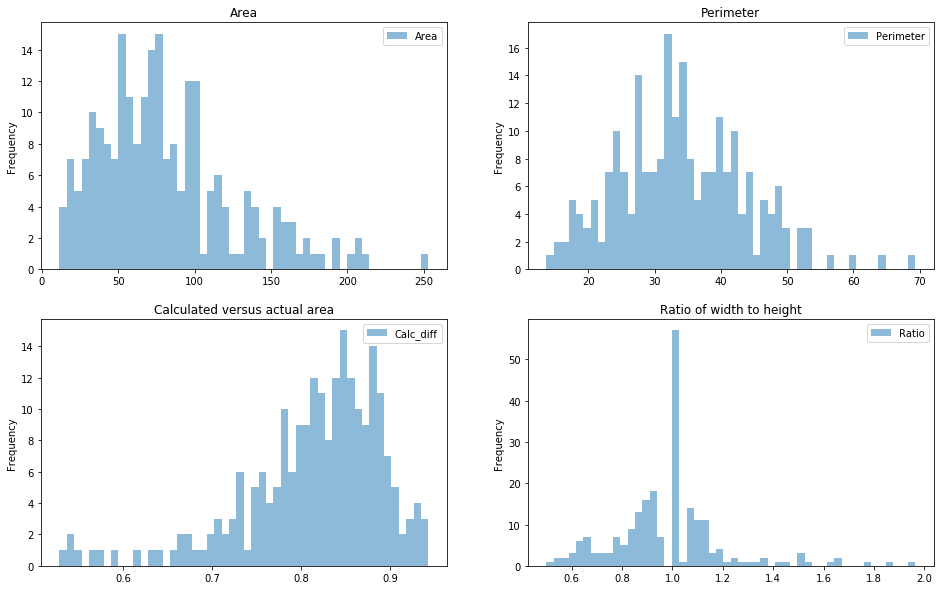

,Area,Calc_diff,Perimeter,Ratio
count,226.000000,226.000000,226.000000,226.000000
mean,80.964602,0.814206,34.103974,0.977935
std,44.822153,0.079511,9.717338,0.224343
min,11.500000,0.528666,13.656854,0.500000
25%,49.875000,0.779895,27.661795,0.857143
50%,73.250000,0.831539,33.551701,1.000000
75%,100.875000,0.869609,40.324116,1.066129
max,253.000000,0.943271,69.331246,1.964286


In [30]:
data = np.concatenate([good92,good93,good101])
data_df = pd.DataFrame({
    'Area':data[:,0],
    'Perimeter':data[:,1],
    'Calc_diff':data[:,2],
    'Ratio':data[:,4]
})

fig1 = plt.figure(0)
ax1 = fig1.add_subplot(221)
ax1.set_title("Area")
data_df.Area.plot.hist(ax=ax1,alpha=0.5,legend=True,figsize=(16,10),bins=50)
ax2 = fig1.add_subplot(222)
ax2.set_title("Perimeter")
data_df.Perimeter.plot.hist(ax=ax2,alpha=0.5,legend=True,figsize=(16,10),bins=50)
ax3 = fig1.add_subplot(223)
ax3.set_title("Calculated versus actual area")
data_df.Calc_diff.plot.hist(ax=ax3,alpha=0.5,legend=True,figsize=(16,10),bins=50)
ax4 = fig1.add_subplot(224)
ax4.set_title("Ratio of width to height")
data_df.Ratio.plot.hist(ax=ax4,alpha=0.5,legend=True,figsize=(16,10),bins=50)

plt.show()
data_df.describe()

In [5]:
total = np.array([mean92,mean93,mean101])
averages = np.mean(total, axis=0)
print(averages)

[82.87073341 34.53686446  0.81345018 14.06161272  0.9798378 ]


In [ ]:
def scale_linear_bycolumn(rawpoints, high=100.0, low=0.0):
    mins = np.min(rawpoints, axis=0)
    maxs = np.max(rawpoints, axis=0)
    rng = maxs - mins
    return high - (((high - low) * (maxs - rawpoints)) / rng)

# good92 = np.append(good92,averages)
list(good92).append(averages)
scaled1 = scale_linear_bycolumn(good92)
normed_avg = scaled1[-1]
normed_scores = scaled1[:-1]
diffs = abs(normed_scores - normed_avg)
print(normed_avg)
print(normed_scores)
print(diffs)

In [ ]:
scores = np.sum(diffs,axis=1)
print(scores)